The implementation of mini project for Applied Machine Learning with MLP

This script mainly focuses on data processing and visualization

In [1]:
!pip install langid

  Using cached langid-1.1.6-py3-none-any.whl


In [2]:
# Import packages

import os
import langid
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'Spotify_Dataset_V3.csv')
spotifybase = pd.read_csv(data_path, delimiter=';')
spotifybase.shape
# Data_Process

(648482, 15)

In [4]:
spotifybase.tail(10)

,Title,Date,Points (Total),id,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Artist (Ind.),lang,Artist Popularity date-1,Song popularity date-1
648472,Paper Planes,2017-01-01,9,1kusepF3AacIEtUTYrw4GV,0.447,0.848,0.786461,0.222,0.033,0.000,0.485,M.I.A.,it,0.0,0.0
648473,Let It Go,2017-01-01,8,13HVjjWUZFaWilh2QUJKsP,0.546,0.311,0.669159,0.029,0.818,0.000,0.246,James Bay,en,53.0,53.0
648474,Famous,2017-01-01,7,19a3JfW8BQwqHWUMbcqSx8,0.465,0.735,0.854824,0.117,0.071,0.000,0.409,Kanye West,en,0.0,0.0
648475,Taped up Heart (feat. Clara Mae),2017-01-01,6,26hcyzSE154xMZCbFdtInA,0.675,0.937,0.860104,0.051,0.152,0.000,0.567,KREAM,en,51.0,51.0
648476,White Iverson,2017-01-01,5,6eT7xZZlB2mwyzJ2sUKG6w,0.675,0.562,0.744692,0.035,0.233,0.000,0.309,Post Malone,en,13.0,13.0
648477,Oh Lord,2017-01-01,4,1sTUEdVO85YU8Ymk2jeAls,0.273,0.794,0.773427,0.068,0.022,0.000,0.377,MiC LOWRY,en,45.0,45.0
648478,Superstition - Single Version,2017-01-01,3,5lXcSvHRVjQJ3LB2rLKQog,0.650,0.658,0.654930,0.085,0.089,0.004,0.883,Stevie Wonder,de,0.0,0.0
648479,Secrets,2017-01-01,2,3DX4Y0egvc0slLcLl31h2p,0.665,0.771,0.797466,0.053,0.016,0.000,0.764,The Weeknd,en,200.0,24.0
648480,Ni**as In Paris,2017-01-01,1,2KpCpk6HjXXLb7nnXoXA5O,0.757,0.882,0.787850,0.248,0.076,0.000,0.684,JAY-Z,en,0.0,0.0
648481,Ni**as In Paris,2017-01-01,1,2KpCpk6HjXXLb7nnXoXA5O,0.757,0.882,0.787850,0.248,0.076,0.000,0.684,Kanye West,en,0.0,0.0


## Data Processing

In [7]:
def get_lang(text):
    try:
        return langid.classify(text)[0]
    except:
        return 'unknown'
spotifybase['lang'] = spotifybase['Title'].apply(lambda x: get_lang(x))

In [ ]:
# for each song, check the date before
# if the song was not in the chart before, then the Points (Total) is 0
# if the song was in the chart before, then the Points (Total) is the Points (Total) from the date before

# convert the date to datetime
spotifybase['Date'] = pd.to_datetime(spotifybase['Date'], format='%d/%m/%Y')

# create an index for the dataframe
spotifybase = spotifybase.reset_index(drop=True)

# # print the columns
# print(spotifybase.columns)

# devide the dataset according to the date, create a list of dataframes
spotifybase_list = [spotifybase[spotifybase['Date'] == x] for x in spotifybase['Date'].unique()]

# print the length of the list
print(len(spotifybase_list))
# for each dataframe in the list
# add the Points (Total) from the date before

for index1, dataframe in enumerate(spotifybase_list):
    # for each song, check the date before
    for index2, row in dataframe.iterrows():
        song = row['id']
        # get the date of the row
        date = row['Date']
        # get the Artist (Ind.) of the row
        artist = row['Artist (Ind.)']
        # get the all the rows from the date before
        row_before = spotifybase_list[index1 - 1].loc[(spotifybase_list[index1 - 1]['Artist (Ind.)'] == artist)]
        # if the song was not in the chart before, then the Points (Total) is 0
        if row_before.empty:
            dataframe.at[index2, 'Artist Popularity date-1'] = 0
        # if the song was in the chart before, then the Artist Popularity is the highest Points (Total) from the date before
        else:
        # print if there are multiple songs from the same artist
            # if len(row_before) > 1:
            #     print("multiple songs from the same artist: ", row_before)
            dataframe.at[index2, 'Artist Popularity date-1'] = row_before['Points (Total)'].max()
        row_before = spotifybase_list[index1 - 1].loc[(spotifybase_list[index1 - 1]['id'] == song)]
        # if the song was not in the chart before, then the Points (Total) is 0
        if row_before.empty:
            dataframe.at[index2, 'Song popularity date-1'] = 0
        # if the song was in the chart before, then the Points (Total) is the Points (Total) from the date before
        else:
            dataframe.at[index2, 'Song popularity date-1'] = row_before['Points (Total)'].max()
        # print the progress

In [ ]:
# store the list of dataframes in a new dataframe, exclude the first dataframe
spotifybase = pd.concat(spotifybase_list[1:])

# print the shape
print(spotifybase.shape)

# change Artist Popularity yesterday to the maximum for each id, Date
spotifybase['Artist Popularity date-1'] = spotifybase.groupby(['id', 'Date'])['Artist Popularity date-1'].transform('max')

# print number of duplicates
print("number of duplicates: ", len(spotifybase[spotifybase.duplicated()]))

# eliminate duplicates
spotifybase = spotifybase.drop_duplicates()

# write to csv
spotifybase.to_csv(os.path.join(os.getcwd(), 'data', 'Spotify_Dataset_V5.csv'), sep=';', index=False)

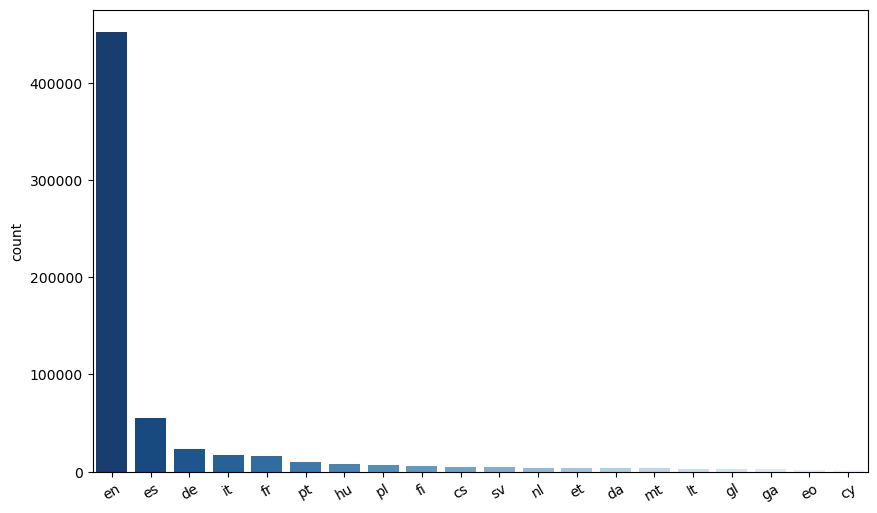

In [5]:
lang_dict = spotifybase["lang"].value_counts().to_dict()
lang_df = pd.DataFrame.from_dict(lang_dict, orient='index', columns=['count'])
lang_df = lang_df.sort_values(by='count', ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(ax=ax, data=lang_df.iloc[:20], x=lang_df.iloc[:20].index, y='count', palette='Blues_r')
plt.xticks(rotation=30)
fig.savefig('Top20_Languages',format='png', facecolor='white', bbox_inches='tight')
plt.show()

In [6]:
# Change language to one-hot-vector
# Choose Top 20 languages
a = spotifybase.drop_duplicates(['lang'])
print(len(a))
top20_lang = spotifybase["lang"].value_counts().iloc[:10].index.to_list()
dummies = pd.get_dummies(spotifybase["lang"])
dummies = dummies[top20_lang]
print(dummies)
spotifybase = pd.concat([spotifybase, dummies], axis=1)


64
        en  es  de  it  fr  pt  hu  pl  fi  cs
0        0   0   0   1   0   0   0   0   0   0
1        0   0   0   1   0   0   0   0   0   0
2        0   1   0   0   0   0   0   0   0   0
3        0   1   0   0   0   0   0   0   0   0
4        1   0   0   0   0   0   0   0   0   0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
648477   1   0   0   0   0   0   0   0   0   0
648478   0   0   1   0   0   0   0   0   0   0
648479   1   0   0   0   0   0   0   0   0   0
648480   1   0   0   0   0   0   0   0   0   0
648481   1   0   0   0   0   0   0   0   0   0

[648482 rows x 10 columns]


<Figure size 1200x800 with 0 Axes>

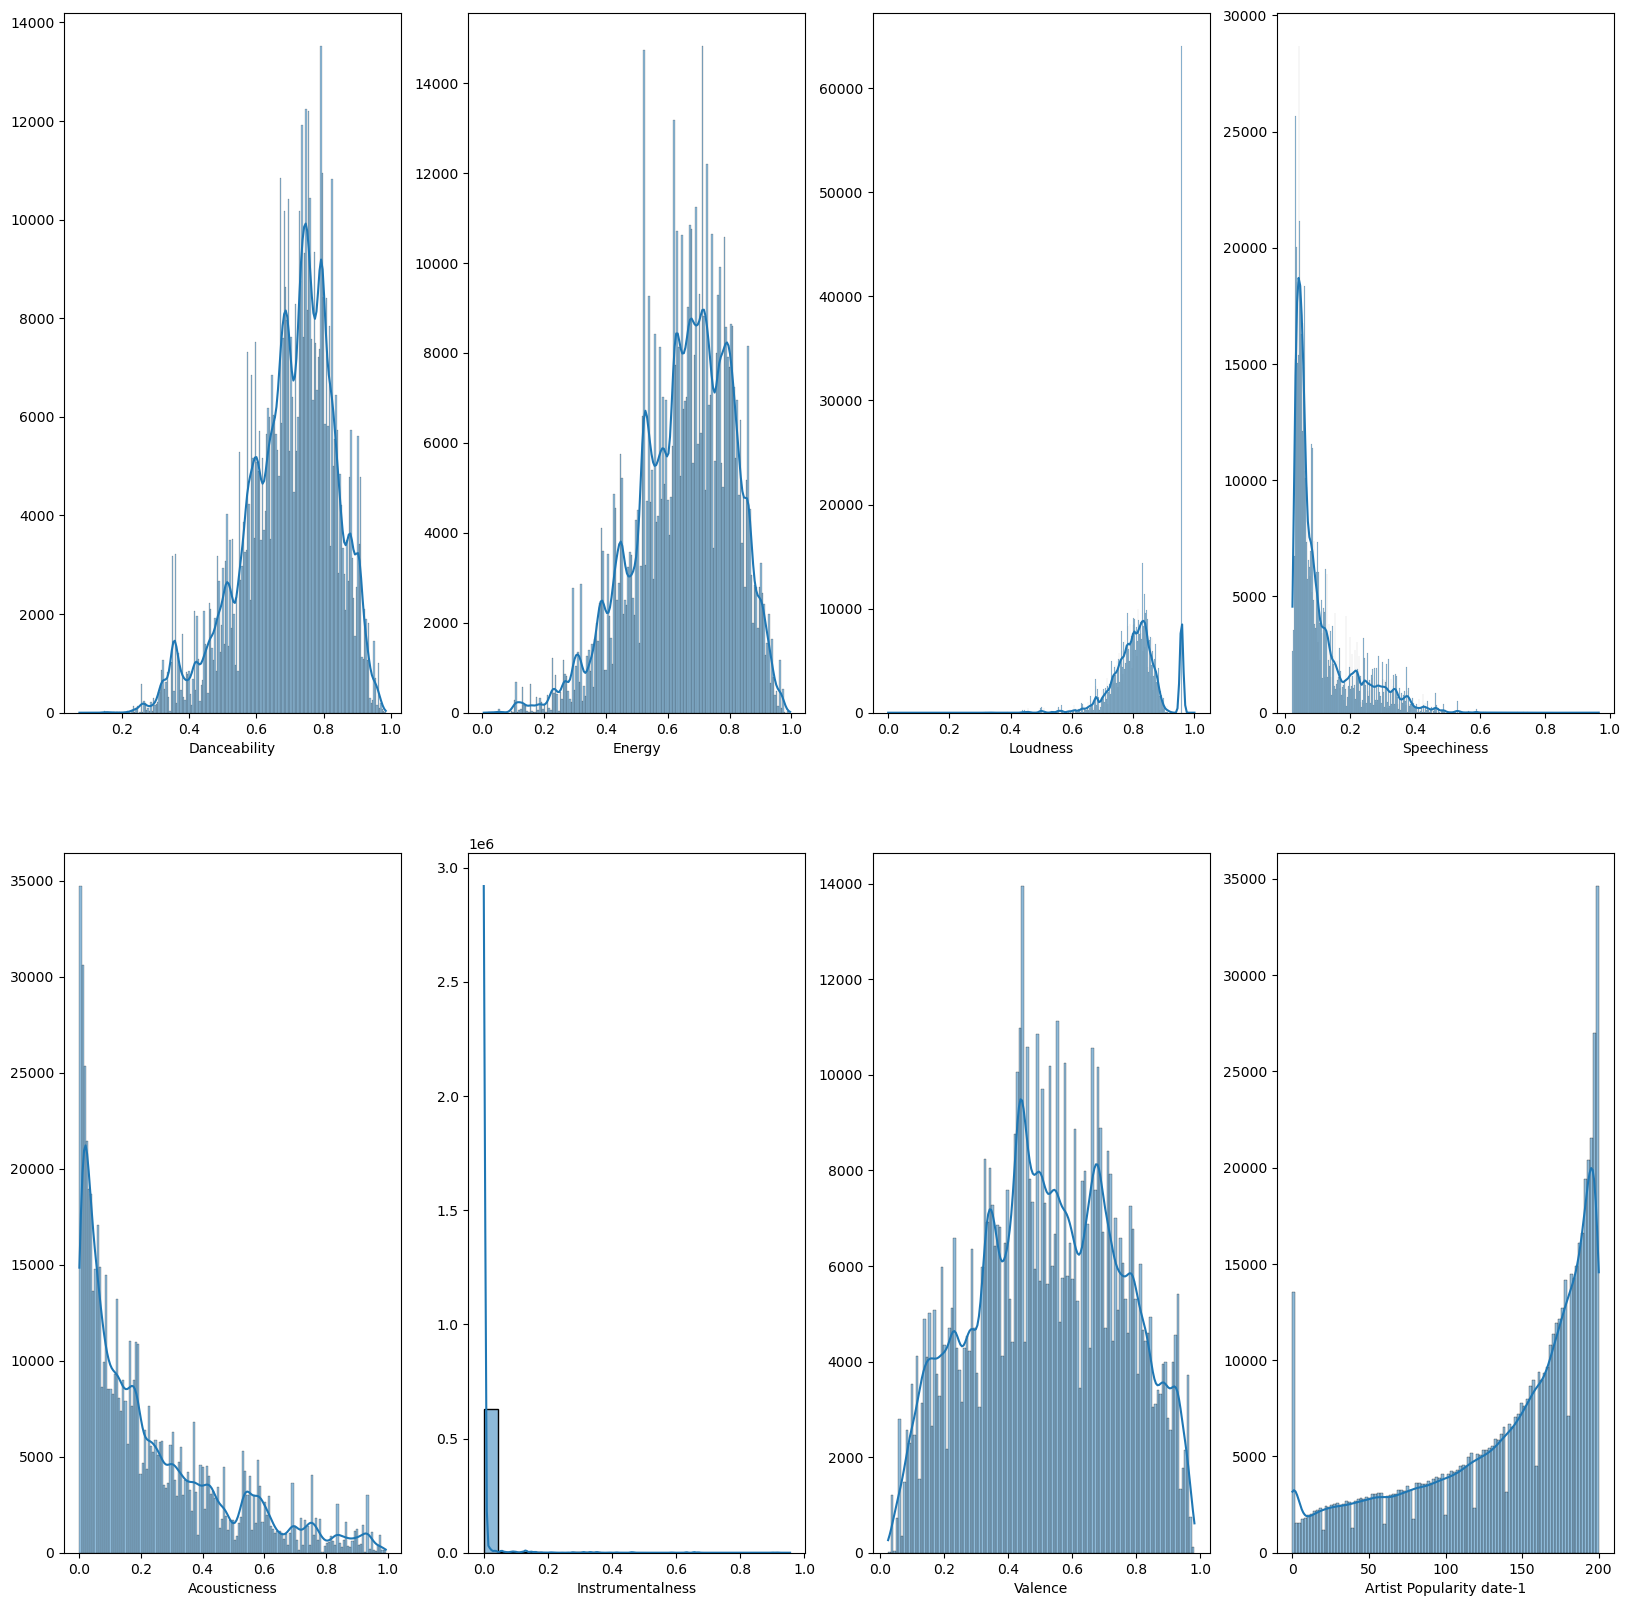

In [7]:
# Numerical features
numer_features = ['Danceability','Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Artist Popularity date-1']
fig = plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(2, 4, figsize=(20, 20))
for i, variable in enumerate(numer_features):
    sns.histplot(ax=axes[i//4, i % 4], data=spotifybase, x=spotifybase[variable], kde=True)
    axes[i//4, i % 4].set(ylabel=None)
# Save Image
fig.savefig('Numerical features distribution.png', format='png',
            facecolor='white', bbox_inches='tight')
plt.show()

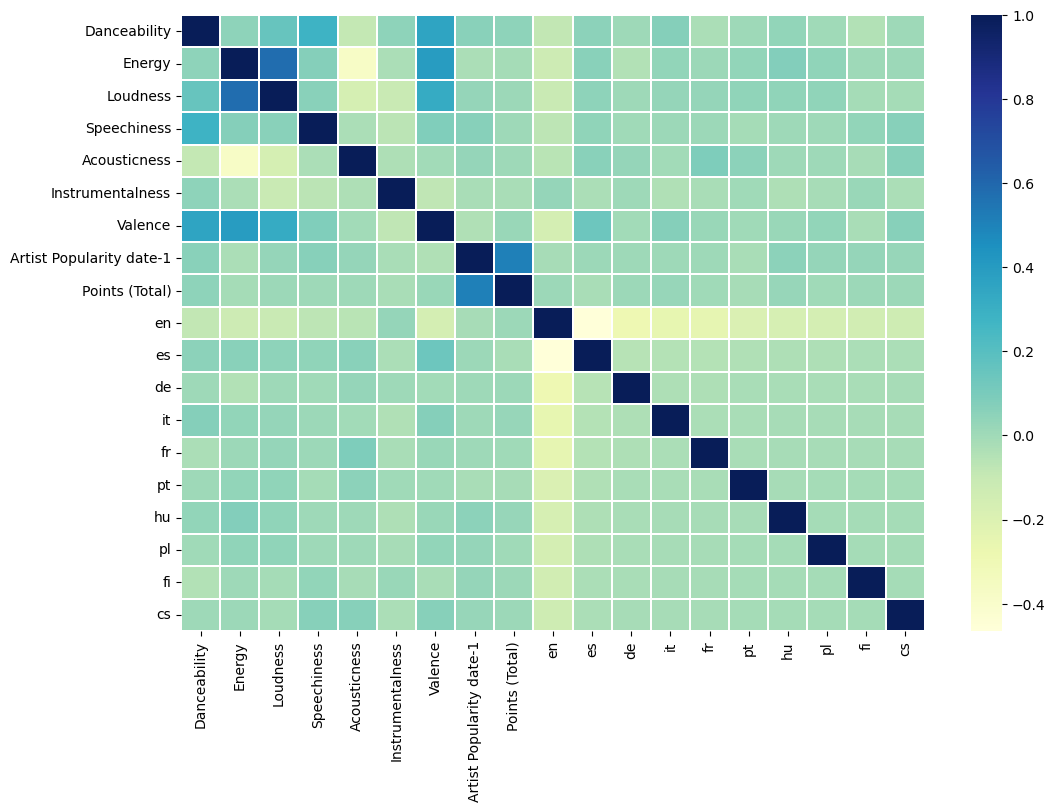

In [8]:
# Create Correlation Matrix
numer_features = ['Danceability','Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Artist Popularity date-1', 'Points (Total)', 'en', 'es', 'de', 'it', 'fr', 'pt', 'hu',  'pl',  'fi', 'cs']
numer_spotify = spotifybase[numer_features]
corrmat = numer_spotify.corr(method='spearman')
  
f, ax = plt.subplots(figsize =(12, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
f.savefig('Correlation.png', format='png',
            facecolor='white', bbox_inches='tight')